In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import time
from sklearn.metrics import accuracy_score

In [2]:
#source_folder = "//home//pc19d//Downloads//hw3//"
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw4"

In [3]:
os.listdir(os.path.join(source_folder,"Gisette"))

['Dataset.pdf',
 'GISETTE.htm',
 'gisette.param',
 'gisette_test.data',
 'gisette_train.data',
 'gisette_train.labels',
 'gisette_valid.data',
 'gisette_valid.labels']

### PreProcessing

In [4]:
def Preprocess(dataset,delimiter):

    Train_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.data"),delimiter =delimiter)
    Train_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.labels"))
    Test_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.data"),delimiter=delimiter)
    Test_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.labels"))
    scaler = preprocessing.StandardScaler().fit(Train_data)
    Train_data = scaler.transform(Train_data)
    Test_data  = scaler.transform(Test_data)
    #print(Train_data.mean(axis=0),Train_data.std(axis=0),Test_data.mean(axis=0),Test_data.std(axis=0))
    
    #Add a column of one
    N_train,N_test              = Train_data.shape[0],Test_data.shape[0]
    Train_data,Test_data        = np.hstack((np.ones((N_train,1)),Train_data)),np.hstack((np.ones((N_test,1)),Test_data))
    
    #Change label's from -1 to 0
    Train_label = np.where(Train_label==-1,0,Train_label)
    Test_label  = np.where(Test_label==-1,0,Test_label)
    Train_label,Test_label = Train_label.reshape(-1,1),Test_label.reshape(-1,1)
    return Train_data,Train_label,Test_data,Test_label

### Train and Predict

In [5]:
def theta(x,LAMBDA):
    return np.where(abs(x)<=LAMBDA,0,x)

In [6]:
def predict(W, data, threshold=0.5):
    p = sigmoid(data@W) >= threshold
    return(p.astype('int'))

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def update_weight(X,Y,X_test,Y_test,LAMBDA,Iter,plot=False):
    N,p = X.shape
    W = np.zeros(shape = (p,1))
    W_0 = W.copy()
    lr = 1/N
    
    if plot:
        err = np.zeros(shape = (2,Iter))

    for i in range(Iter):
        prod = 1/(1+np.exp(-1*np.matmul(X,W_0)))
        W = W_0 + lr*np.matmul(X.T,Y-prod) 
        W = theta(W,LAMBDA)
        W_0 = W.copy()
        if plot:
                Predicted_label_train  = predict(W,X,threshold=0.5)
                Predicted_label_test   = predict(W,X_test,threshold=0.5)
                train_error,test_error = 1-accuracy_score(Y,Predicted_label_train),1-accuracy_score(Y_test,Predicted_label_test)
                err[0][i],err[1][i] = train_error,test_error
    
    print("Number of Non-Zero Feature %d"%np.count_nonzero(W))
    Predicted_label_train  = predict(W,X,threshold=0.5)
    Predicted_label_test   = predict(W,X_test,threshold=0.5)
    train_error,test_error = 1-accuracy_score(Y,Predicted_label_train),1-accuracy_score(Y_test,Predicted_label_test)
    print("Train Error : %f ,Test error : %f"%(train_error,test_error))
    
    if plot:
        plt.plot(err[0],label="Train Error")
        plt.plot(err[1],label="Test  Error")
        plt.legend()
        plt.xlabel("Iterations")
        plt.ylabel("Misclassification Error")
        plt.title("Error For 300 features as function of Iteration")
        
    return W,train_error,test_error

### To plot the graph

In [9]:
def plot(X,Y,X_test,Y_test,LAMBDA_LIST,name):
    Features  = np.array([10,30,100,300,500])
    Iter = 100
    train_error = [0]*len(LAMBDA_LIST)
    test_error  = [0]*len(LAMBDA_LIST)
    for i,LAMBDA in enumerate(LAMBDA_LIST):
        _,train_error[i],test_error[i] = update_weight(X,Y,X_test,Y_test,LAMBDA,Iter,False)

    plt.xticks(np.linspace(0,len(Features)-1,len(Features)),Features) 
    plt.plot(train_error,label="Train Error")
    plt.plot(test_error,label="Test Error")
    plt.xlabel("Features")
    plt.ylabel("Misclassification_error")
    plt.title("Error For %s Dataset as function of features" %name)
    plt.legend()
    plt.show()

# Part 1

In [10]:
dataset  = str("Gisette")
Train_data,Train_label,Test_data,Test_label = Preprocess(dataset,delimiter="")
Train_data.shape,Train_label.shape,Test_data.shape,Test_label.shape

((6000, 5001), (6000, 1), (1000, 5001), (1000, 1))

#### To find $\lambda$

In [11]:
start = time.time()
LAMBDA = 0.039
Iter = 100
_,_,_ = update_weight(Train_data,Train_label,Test_data,Test_label,LAMBDA,Iter,False)
print("Total RUN TIME : ",time.time()-start)

Number of Non-Zero Feature 492
Train Error : 0.007667 ,Test error : 0.015000
Total RUN TIME :  4.614844799041748


$\lambda = 0.19$, Features = 10<br>
$\lambda = 0.133$, Features = 30<br>
$\lambda = 0.088$, Features = 98<br>
$\lambda = 0.053$, Features = 299<br>
$\lambda = 0.039$, Features = 492<br>

##### To plot error for different features

Number of Non-Zero Feature 10
Train Error : 0.121333 ,Test error : 0.123000
Number of Non-Zero Feature 30
Train Error : 0.071333 ,Test error : 0.078000
Number of Non-Zero Feature 98
Train Error : 0.032333 ,Test error : 0.037000
Number of Non-Zero Feature 299
Train Error : 0.012500 ,Test error : 0.016000
Number of Non-Zero Feature 492
Train Error : 0.007667 ,Test error : 0.015000


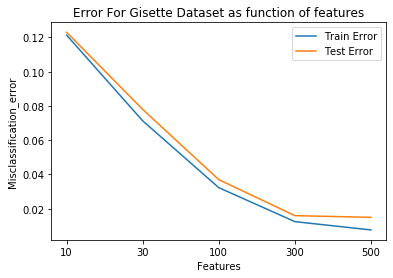

In [12]:
LAMBDA_LIST = np.array([0.19,0.133,0.088,0.053,0.039])
plot(Train_data,Train_label,Test_data,Test_label,LAMBDA_LIST,"Gisette")

##### For 300 features as function of iteration

Number of Non-Zero Feature 299
Train Error : 0.012500 ,Test error : 0.016000
Total RUN TIME :  6.496105909347534


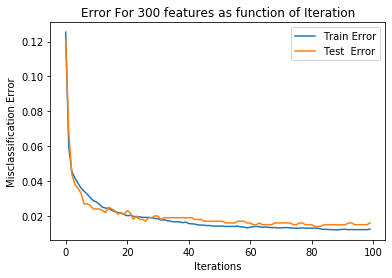

In [13]:
start = time.time()
LAMBDA = 0.053
Iter = 100
W,_,_ = update_weight(Train_data,Train_label,Test_data,Test_label,LAMBDA,Iter,True)
print("Total RUN TIME : ",time.time()-start)

# Part 2

In [14]:
dataset2  = str("Dexter")
Train_data2,Train_label2,Test_data2,Test_label2 = Preprocess(dataset2,delimiter=",")
Train_data2.shape,Train_label2.shape,Test_data2.shape,Test_label2.shape

((300, 20001), (300, 1), (300, 20001), (300, 1))

#### To find $\lambda$

In [15]:
start = time.time()
LAMBDA = 0.0465
Iter = 100
_,_,_ = update_weight(Train_data2,Train_label2,Test_data2,Test_label2,LAMBDA,Iter,False)
print("Total RUN TIME : ",time.time()-start)

Number of Non-Zero Feature 507
Train Error : 0.000000 ,Test error : 0.083333
Total RUN TIME :  0.9803793430328369


$\lambda = 0.14$, Features = 11<br>
$\lambda = 0.1$, Features = 26<br>
$\lambda = 0.07$, Features = 103<br>
$\lambda = 0.0525$, Features = 294<br>
$\lambda = 0.0465$, Features = 507<br>


##### To plot error for different features

Number of Non-Zero Feature 11
Train Error : 0.120000 ,Test error : 0.170000
Number of Non-Zero Feature 26
Train Error : 0.063333 ,Test error : 0.103333
Number of Non-Zero Feature 103
Train Error : 0.016667 ,Test error : 0.080000
Number of Non-Zero Feature 294
Train Error : 0.000000 ,Test error : 0.066667
Number of Non-Zero Feature 507
Train Error : 0.000000 ,Test error : 0.083333


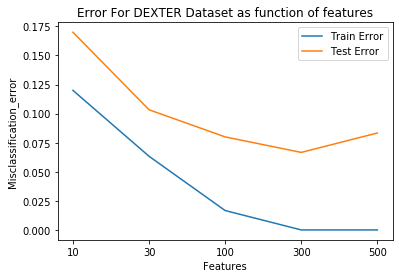

In [16]:
LAMBDA_LIST2 = np.array([0.14,0.1,0.07,0.0525,0.0465])
plot(Train_data2,Train_label2,Test_data2,Test_label2,LAMBDA_LIST2,"DEXTER")

##### For 300 features as function of iteration

Number of Non-Zero Feature 294
Train Error : 0.000000 ,Test error : 0.066667
Total RUN TIME :  1.610335350036621


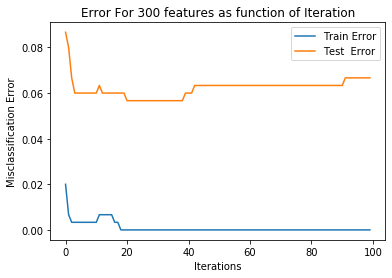

In [17]:
start = time.time()
LAMBDA = 0.0525
Iter = 100
W,_,_ = update_weight(Train_data2,Train_label2,Test_data2,Test_label2,LAMBDA,Iter,True)
print("Total RUN TIME : ",time.time()-start)

# Part 3

In [18]:
dataset3  = str("MADELON")
Train_data3,Train_label3,Test_data3,Test_label3 = Preprocess(dataset3,delimiter="")
Train_data3.shape,Train_label3.shape,Test_data3.shape,Test_label3.shape

((2000, 501), (2000, 1), (600, 501), (600, 1))

#### To find $\lambda$

In [80]:
start = time.time()
LAMBDA = 0.030
Iter = 100
_,_,_ = update_weight(Train_data3,Train_label3,Test_data3,Test_label3,LAMBDA,Iter,False)
print("Total RUN TIME : ",time.time()-start)

Number of Non-Zero Feature 8
Train Error : 0.386000 ,Test error : 0.395000
Total RUN TIME :  0.1166539192199707


$\lambda = 0.030$, Features = 8<br>
$\lambda = 0.0245$, Features = 29<br>
$\lambda = 0.0175$, Features = 97<br>
$\lambda = 0.0075$, Features = 298<br>
$\lambda = 0.0001$, Features = 499<br>


Number of Non-Zero Feature 8
Train Error : 0.386000 ,Test error : 0.395000
Number of Non-Zero Feature 29
Train Error : 0.365000 ,Test error : 0.428333
Number of Non-Zero Feature 97
Train Error : 0.330000 ,Test error : 0.425000
Number of Non-Zero Feature 298
Train Error : 0.269500 ,Test error : 0.428333
Number of Non-Zero Feature 499
Train Error : 0.260500 ,Test error : 0.426667


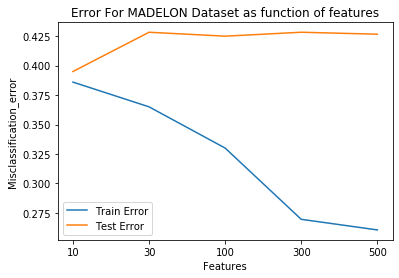

In [81]:
LAMBDA_LIST3 = np.array([0.030,0.0245,0.0175,0.0075,0.0001])
plot(Train_data3,Train_label3,Test_data3,Test_label3,LAMBDA_LIST3,"MADELON")

Number of Non-Zero Feature 298
Train Error : 0.269500 ,Test error : 0.428333
Total RUN TIME :  0.40691184997558594


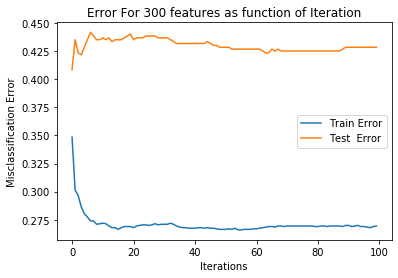

In [82]:
start = time.time()
LAMBDA = 0.0075
Iter = 100
W,_,_ = update_weight(Train_data3,Train_label3,Test_data3,Test_label3,LAMBDA,Iter,True)
print("Total RUN TIME : ",time.time()-start)